In [28]:
from pyteomics import mzxml, auxiliary
from matplotlib import pyplot as plt
import numpy as np 
import os
import pandas as pd
import math
import random
from itertools import product

f = "/home/rcardiff/meyer_raw_data/C18_neg/CL/CL1.mzXML"
#f = '/home/rcardiff/ryan/ryan/meyer_raw_data/C18_neg/CL/CL7.mzXML'
a = mzxml.read(f) 

rt, mz, intensity = ([] for i in range(3))

for spectra in a:
	mz.append(spectra.get('m/z array'))
	intensity.append(spectra.get('intensity array'))
	rt.append(spectra.get('retentionTime'))


minMz = 0
maxMz = 1000
minRt = 0
maxRt = 30


#rt_buckets = np.linspace(.02,.25,5)
#mz_buckets = np.linspace(.001, .01, 5)

#### Read mzxml files and scrape mz, rt, and intensity data

In [1]:
from pyteomics import mzxml, auxiliary
from matplotlib import pyplot as plt
import numpy as np 
import os
import pandas as pd
import math
import random
from itertools import product
from tqdm import tqdm_notebook as tqdm


directory = "/home/rcardiff/ryan/ryan/public_data/ftp.ebi.ac.uk/pub/databases/metabolights/studies/public/MTBLS944/"
os.chdir(directory)
files = os.listdir(directory)

rt, mz, intensity = ([] for i in range(3))
minMz = 0
maxMz = 1000
minRt = 0
maxRt = 30

for f in files:
    if f.endswith(".mzXML"):
        a = mzxml.read(f) 
        for spectra in a:
            #mz.append(np.round(spectra.get('m/z array'), 2))
            intensity.append(spectra.get('intensity array'))
            #rt.append(round(spectra.get('retentionTime')*(1/.02))/(1/.02))
print("Done")

#np.save('/home/rcardiff/ryan/ryan/public_data/test_msconvert/mz.npy', mz)
#np.save('/home/rcardiff/ryan/ryan/public_data/test_msconvert/rt.npy', rt)
np.save('/home/rcardiff/ryan/ryan/public_data/test_msconvert/intensity.npy', intensity)

Done


In [ ]:
n = []
for i in range(len(mz)):
    n.append(len(mz[i]))
n = np.save('/home/rcardiff/ryan/ryan/public_data/test_msconvert/n.npy')

In [2]:
del mz
del mz_out


In [9]:
rt_out = []
for i in range(len(n)):
    rt_out.append([rt[i]]*n[i])
rt_out = np.concatenate(rt_out).ravel()

np.save('/home/rcardiff/ryan/ryan/public_data/test_msconvert/rt_out.npy', rt_out)


In [ ]:
from pyteomics import mzxml, auxiliary
from matplotlib import pyplot as plt
import numpy as np 
import os
import pandas as pd
import math
import random
from itertools import product
from tqdm import tqdm_notebook as tqdm


directory = "/home/rcardiff/ryan/ryan/public_data/test_msconvert/MTBLS1115/"
os.chdir(directory)
files = os.listdir(directory)

rt, mz, intensity = ([] for i in range(3))
minMz = 0
maxMz = 1000
minRt = 0
maxRt = 30

for f in files:
    if f.endswith(".mzXML"):
        a = mzxml.read(f) 
        for spectra in a:
            mz.append(spectra.get('m/z array'))
            intensity.append(spectra.get('intensity array'))
            rt.append(spectra.get('retentionTime'))
print("Done")

In [1]:
import numpy as np

mz = np.load('/home/rcardiff/ryan/ryan/public_data/test_msconvert/mz.npy', allow_pickle = True)
rt = np.load('/home/rcardiff/ryan/ryan/public_data/test_msconvert/rt.npy', allow_pickle = True)
intensity = np.load('/home/rcardiff/ryan/ryan/public_data/test_msconvert/intensity.npy', allow_pickle = True)

In [ ]:
mz_out = np.concatenate(mz).ravel()

rt_out = []
n = len(mz)
for i in range(n):
    rt_out.append([rt[i]]*len(mz[i]))
rt_out = np.concatenate(rt_out).ravel()
i_out = np.concatenate(intensity).ravel()

print(len(mz_out))

In [23]:
import numpy as np
from tqdm import tqdm_notebook as tqdm

np.save('/home/rcardiff/ryan/ryan/mz_out.npy', mz_out)
np.save('/home/rcardiff/ryan/ryan/rt_out.npy', rt_out)
np.save('/home/rcardiff/ryan/ryan/i_out.npy', i_out)

#mz_out = np.load('/home/rcardiff/ryan/ryan/mz_out.npy') #, allow_pickle =True)
# rt_out = np.load('/home/rcardiff/ryan/ryan/rt_out.npy') #, allow_pickle = True)
# i_out = np.load('/home/rcardiff/ryan/ryan/i_out.npy') #, allow_pickle = True)

In [12]:
from joblib import Parallel, delayed

#### Sort mz, rt, and intensity values by mz value

In [ ]:
max(mz_out)

In [ ]:
from tqdm.notebook import tqdm as tqdm

#rounding is very slow - is there a faster way?

mz_round = tqdm([round(m1*(1/.01))/(1/.01) for m1 in mz_out])
#mz_round = ([np.round(m,3) for m in mz_round])
mz_out = mz_round

rt_round = ([round(r*(1/.02))/(1/.02) for r in rt_out])   
rt_out = rt_round

print(len(mz_out))
print("Done")

In [24]:
import numpy as np
import pandas as pd

#mz_out = np.load('/home/rcardiff/ryan/ryan/mz_out.npy') #, allow_pickle =True)
# rt_out = np.load('/home/rcardiff/ryan/ryan/rt_out.npy') #, allow_pickle = True)
# i_out = np.load('/home/rcardiff/ryan/ryan/i_out.npy') #, allow_pickle = True)

minMz = 0
maxMz = 1000

mz_list = np.arange(minMz,maxMz, .01)
mz_list = np.round(mz_list,2)
print(len(mz_list))

sort_args = np.argsort(mz_out)

# df_zipped = pd.DataFrame({'mz' : mz_out, 'rt' : rt_out, 'i' : i_out})
# zipped_data = list(zip(mz_out, rt_out, i_out))
#zipped_data = sorted(zipped_data, key = lambda tup : tup[0])
from tqdm import tqdm_notebook as tqdm

100000


In [4]:
#rt_out = np.load('/home/rcardiff/ryan/ryan/rt_out.npy') #, allow_pickle = True)
#i_out = np.load('/home/rcardiff/ryan/ryan/i_out.npy') #, allow_pickle = True)


In [25]:
mz_out = mz_out[sort_args]
rt_out = rt_out[sort_args]
i_out = i_out[sort_args]

In [26]:
del sort_args

In [21]:
mz_out[-200:]
rt_out[-200:]

array([ 2.3 , 23.22, 27.86, 25.06, 25.6 , 21.88, 27.6 , 27.86, 23.46,
       14.6 , 17.62, 27.58, 22.38, 14.56, 27.1 , 19.2 , 24.26,  8.16,
       22.6 , 23.44,  3.96, 28.48, 15.8 , 27.1 , 28.76, 24.44,  7.44,
        1.66,  1.46, 23.52, 23.42,  1.16, 23.4 ,  1.46, 23.66,  1.16,
       18.18,  1.6 ,  1.6 ,  1.56,  1.56, 23.68,  1.66, 23.26,  1.6 ,
        1.16, 16.62,  1.6 ,  4.38,  1.6 ,  4.38,  0.34,  1.58,  1.46,
       23.26,  4.96, 23.26, 22.98,  0.34, 23.66, 23.52,  1.64, 23.42,
        0.34,  1.56,  1.46, 23.68,  1.58, 18.48,  4.38, 23.52,  1.16,
        1.6 ,  1.16,  1.56,  4.38,  1.16,  4.48,  1.46,  1.56,  4.48,
       10.02,  1.66,  1.58, 18.18,  1.6 ,  4.38,  1.64,  1.58,  1.56,
        1.6 ,  1.56,  1.46,  1.66, 10.02,  1.46,  1.56, 16.62, 16.62,
        1.58, 18.18,  0.34,  1.6 ,  1.64,  0.34,  1.66,  4.38,  4.38,
        1.6 ,  1.56,  0.34, 10.02,  1.56,  1.66, 18.18,  1.58, 16.62,
       18.18, 16.62, 18.48,  1.58,  1.6 ,  4.48,  1.6 ,  1.58,  1.58,
        1.58,  4.96,

#### Create csv grid of mz vs. rt space

In [27]:
#YES THIS ONE
import csv
from tqdm import tqdm_notebook as tqdm
from ipywidgets import IntProgress

print(len(mz_out))
min_mz_out = min(mz_out)
#min_mz_out = 150
max_mz_out = max(mz_out)
#max_mz_out = 250

mz_loc = 0
with open('/home/rcardiff/ryan/ryan/mtbls_predictions/mtbls951/mtbls951-short.csv', 'w') as f:
    writer = csv.writer(f, delimiter=',')
    for mz in tqdm(mz_list):
    #for mz in mz_list:
        col = np.zeros(int(30/.02)+1)
        if mz < min_mz_out:
            writer.writerow(col)
            continue
        if mz > max_mz_out:
            writer.writerow(col)
            continue
            
        while mz_out[mz_loc]<= mz:
            rt = rt_out[mz_loc]
            i = i_out[mz_loc]
            col[int(rt/.02)] += i
            mz_loc += 1
            if mz_loc == len(mz_out):
                break
        writer.writerow(col)
print("Done")

28697509


/root/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  from ipykernel import kernelapp as app



Done


In [28]:
print(mz_loc)
print(len(mz_out))
print(max_mz_out)
print(mz)
print(mz_out[mz_loc-1])

28697348
28697509
3201.94
999.99
998.21


#### Create image from csv grid

In [ ]:
#https://stackoverflow.com/questions/902761/saving-a-numpy-array-as-an-image
from numpy import genfromtxt
import numpy as np
import os
#from PIL import Image
#import imageio
#import matplotlib.image
import cv2


f = "/home/rcardiff/ryan/ryan/mtbls_predictions/mtbls951/mtbls951-short.csv"

image_array = genfromtxt(f, delimiter=',')
image_array = image_array.astype('float64')

#cv2.imwrite("/home/rcardiff/ryan/ryan/meyer_pos.png", image_array)

In [30]:
#https://stackoverflow.com/questions/8956832/python-out-of-memory-on-large-csv-file-numpy
import numpy as np

def iter_loadtxt(filename, delimiter=',', skiprows=0, dtype=float):
    def iter_func():
        with open(filename, 'r') as infile:
            for _ in range(skiprows):
                next(infile)
            for line in infile:
                line = line.rstrip().split(delimiter)
                for item in line:
                    yield dtype(item)
        iter_loadtxt.rowlength = len(line)

    image_array = np.fromiter(iter_func(), dtype=dtype)
    image_array = image_array.reshape((-1, iter_loadtxt.rowlength))
    return image_array
image_array = iter_loadtxt(filename = '/home/rcardiff/ryan/ryan/mtbls_predictions/mtbls951/mtbls951-short.csv')

In [31]:
image_array.shape

(100000, 1501)

In [32]:
import cv2

cv2.imwrite("/home/rcardiff/ryan/ryan/mtbls951-short.png", image_array)

True

In [ ]:
import csv

results = []

with open("/home/rcardiff/ryan/ryan/neg_CL_IC_110520.csv") as csvfile:
    reader = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC) # change contents to floats
    for row in reader: # each row is a list
        results.append(row)

In [ ]:
print(len(image_array[0]))
print(len(image_array))

def first_nonzero(arr, axis, invalid_val=-1):
    mask = arr!=0
    return np.where(mask.any(axis=axis), mask.argmax(axis=axis), invalid_val)

d = first_nonzero(image_array, axis=1, invalid_val=0)
np.set_printoptions(threshold=np.inf)
print(np.nonzero(d)[0][0])

In [ ]:
#run time ~1min for 1500x80000 image
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature
from skimage.measure import regionprops
import matplotlib.patches as mpatches
from skimage.morphology import label
import pandas as pd
from skimage import color 
import os

image = cv.imread("/home/rcardiff/ryan/ryan/test_files/combined_img-3.png",0)
#image = color.rgb2gray(image)

edges = feature.canny(image, sigma=1.5,
                     low_threshold=193,
                     high_threshold=225)


# Label image regions.
label_image = label(edges)
print(len(regionprops(label_image)))




3479


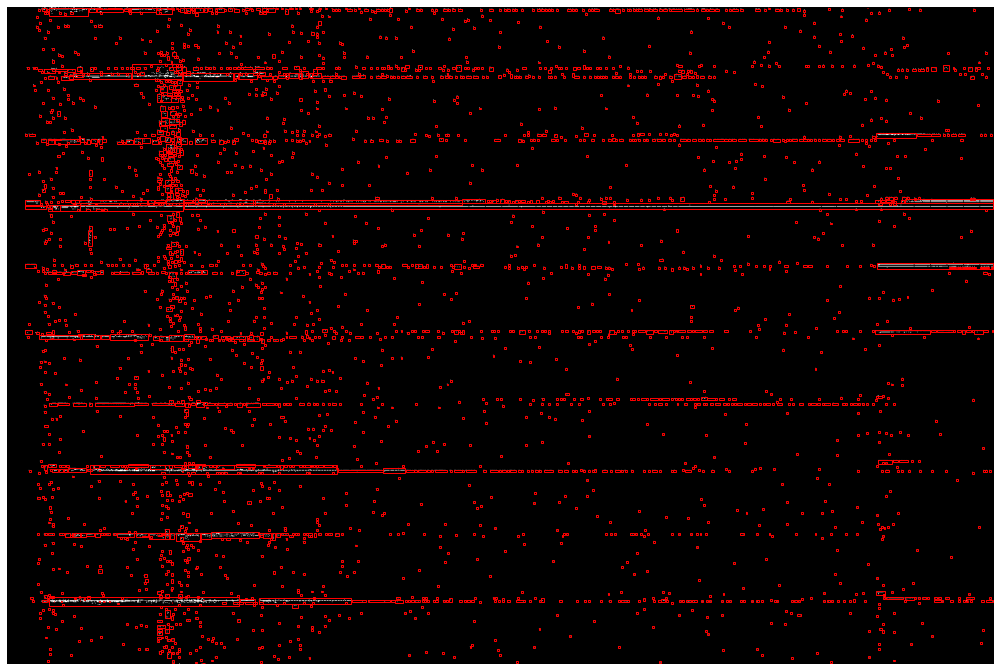

In [1]:
#run time ~1min for 1500x80000 image
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature
from skimage.measure import regionprops
import matplotlib.patches as mpatches
from skimage.morphology import label
import pandas as pd

image = cv.imread("/home/rcardiff/ryan/ryan/test_files/combined_img.png",0)
image = image[10000:11000]
edges = feature.canny(image, sigma=.5,
                     low_threshold=193,
                     high_threshold=225)


# Label image regions.
label_image = label(edges)
print(len(regionprops(label_image)))

fig, ax5 = plt.subplots(figsize=(14, 14))
ax5.imshow(image, cmap=plt.cm.gray)
ax5.axis('off')

for region in regionprops(label_image):
    # Draw rectangle around segmented coins.
    minr, minc, maxr, maxc = region.bbox
    # min_mz, min_rt, max_mz, max_rt = region.bbox
    rect = mpatches.Rectangle((minc, minr),
                              maxc - minc,
                              maxr - minr,
                              fill=False,
                              edgecolor='red',
                              linewidth=1)
    ax5.add_patch(rect)
    
plt.tight_layout()
plt.show()

In [ ]:
#run time <1 min
data = {'Feature':[],'min_mz':[],'max_mz':[],'mean_mz':[],'min_rt':[],'max_rt':[],'mean_rt':[]}
df = pd.DataFrame(data)
c = 0
for region in regionprops(label_image):
    min_mz, min_rt, max_mz, max_rt = region.bbox
    r = pd.Series(['FT'+str(c), (min_mz/100), (max_mz/100), (np.mean([min_mz, max_mz])/100), min_rt*1.2, max_rt*1.2, np.mean([min_rt, max_rt])*1.2], index = ['Feature','min_mz','max_mz','mean_mz','min_rt','max_rt','mean_rt'])
    df = df.append(r,ignore_index = True)
    c+=1
df.to_csv('/home/rcardiff/feature_test_1217-2.tsv', sep = '\t')

In [ ]:
image = cv.imread('/home/rcardiff/combined_img.png',0)
fig, ax = plt.subplots(1, 1)
ax.hist(image.ravel(), bins=8, range=[0, 256]) #ravel returns flattened 1d array
ax.set_xlim(32, 193);
ax.set_ylim(0,10)